In [215]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#SKLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [219]:
#selection of in-store column
store_col = data['in-store']

In [220]:
store_col.head()

0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64

In [221]:
#selection of the age column
age_col = data['age']

In [222]:
age_col.head()

0    37
1    35
2    45
3    46
4    33
Name: age, dtype: int64

In [223]:
#selection of items columns
items_col = data['items']

In [224]:
items_col.head()

0    4
1    2
2    3
3    3
4    4
Name: items, dtype: int64

In [225]:
#selection of amount colums
amount_col = data['amount']

In [226]:
amount_col.head()

0     281.03
1     219.51
2    1525.70
3     715.25
4    1937.50
Name: amount, dtype: float64

In [227]:
#selection of region column
region_col = data['region']

In [228]:
region_col.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [229]:
#selection the first 100 rows of the dataframe
data[0:100]

,in-store,age,items,amount,region
0,0,37,4,281.030,2
1,0,35,2,219.510,2
2,1,45,3,1525.700,4
3,1,46,3,715.250,3
4,1,33,4,1937.500,1
...,...,...,...,...,...
95,0,58,4,165.280,2
96,1,19,7,1995.000,1
97,0,80,1,13.109,2
98,0,58,7,200.310,2


In [230]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')

Summary of feature sample


In [231]:
X.head()

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [232]:
y = data['region']
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [233]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123)

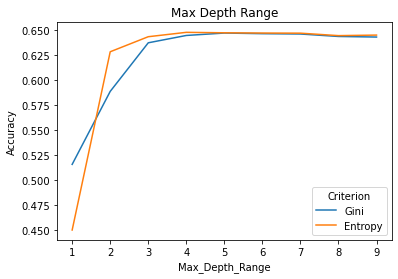

In [234]:
#Modeling (Classification)
max_depth_range = list(range(1, 10))
accuracy_df=pd.DataFrame({'Max_depth':[],'Accuracy':[],'Criterion':[]})

for depth in max_depth_range:
    # Score Criterion = Gini
    tune_algo = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    tune_algo.fit(X_train, y_train)    
    score = tune_algo.score(X_test, y_test)
    accuracy_df=accuracy_df.append({'Max_depth':depth,'Accuracy':score,'Criterion':'Gini'},ignore_index=True)
    # Score Criterion = Entropy
    ent_tune_algo = DecisionTreeClassifier(max_depth = depth,random_state = 0, criterion='entropy')
    ent_tune_algo.fit(X_train, y_train)    
    ent_score = ent_tune_algo.score(X_test, y_test)
    accuracy_df=accuracy_df.append({'Max_depth':depth,'Accuracy':ent_score,'Criterion':'Entropy'},ignore_index=True)

# Plot Max_Depth Range Tuning:
sns.lineplot(x='Max_depth', y='Accuracy', data=accuracy_df,hue='Criterion')
plt.xlabel("Max_Depth_Range")
plt.ylabel("Accuracy")
plt.title("Max Depth Range")
plt.show()

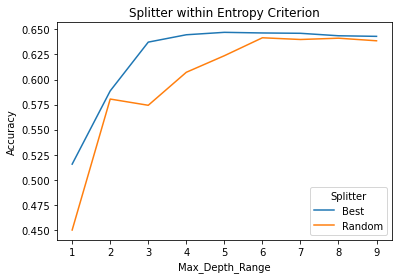

In [235]:
# Dataframe to store the accuracy for each value of max_depth:
accuracy_df=pd.DataFrame({'Max_depth':[],'Accuracy':[],'Criterion':[],'Splitter':[]})

for depth in max_depth_range:
    # Score Splitter = Best
    tune_algo = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    tune_algo.fit(X_train, y_train)    
    score = tune_algo.score(X_test, y_test)
    accuracy_df=accuracy_df.append({'Max_depth':depth,'Accuracy':score,'Criterion':'Entropy','Splitter':'Best'},ignore_index=True)
    
    # Score Splitter = Random
    rand_tune_algo = DecisionTreeClassifier(max_depth = depth,random_state = 0, criterion='entropy',splitter='random')
    rand_tune_algo.fit(X_train, y_train)    
    rand_score = rand_tune_algo.score(X_test, y_test)
    accuracy_df=accuracy_df.append({'Max_depth':depth,'Accuracy':rand_score,'Criterion':'Entropy','Splitter':'Random'},ignore_index=True)
    
# Plot Splitter Tuning
sns.lineplot(x='Max_depth', y='Accuracy', data=accuracy_df,hue='Splitter')
plt.xlabel("Max_Depth_Range")
plt.ylabel("Accuracy")
plt.title("Splitter within Entropy Criterion")
plt.show()

#### Decision Tree Classification

In [236]:
algo_DTC = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_leaf=10)
model = algo_DTC.fit(X_train, y_train)
preds = model.predict(X_test)

In [237]:
preds

array([2, 4, 3, ..., 1, 3, 4])

In [238]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.54      0.47      4857
           2       0.90      1.00      0.95      5945
           3       0.56      0.24      0.33      5389
           4       0.65      0.73      0.69      7809

    accuracy                           0.65     24000
   macro avg       0.63      0.63      0.61     24000
weighted avg       0.64      0.65      0.63     24000



In [239]:
from sklearn.tree import plot_tree

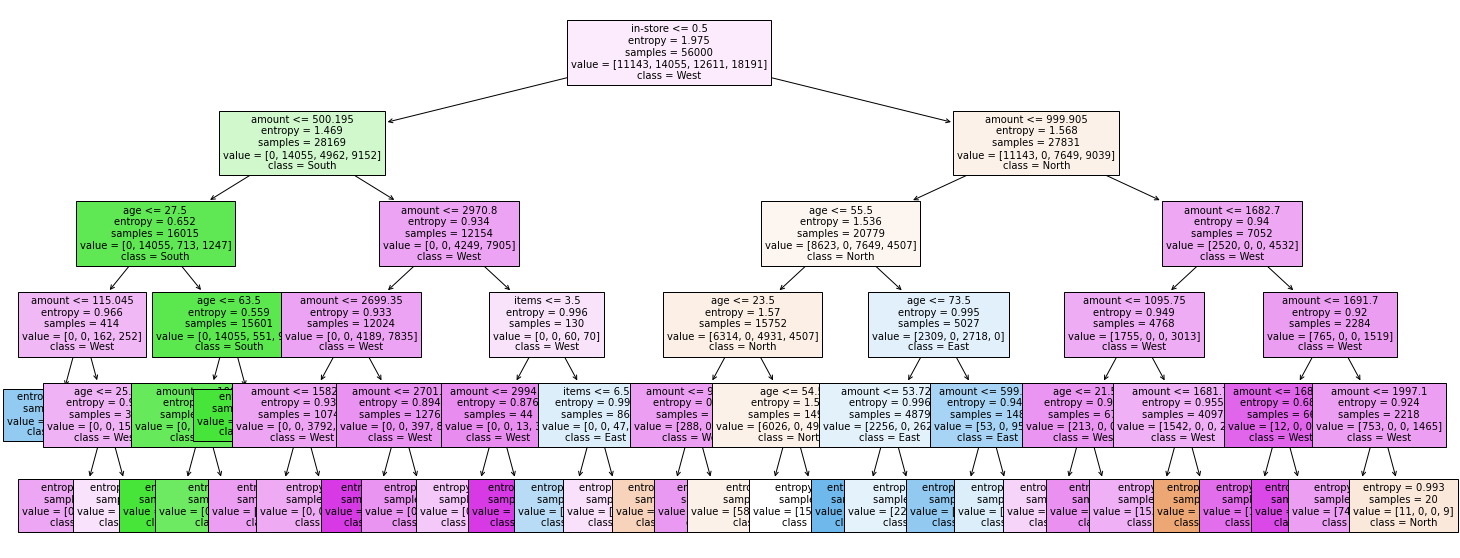

In [240]:
fig = plt.figure(figsize=(25,10))
tree = plot_tree(model,feature_names=X.columns,class_names=['North', 'South', 'East', 'West'], filled=True,fontsize=10)

#### Cross validation

In [241]:
from sklearn.model_selection import cross_val_score
# algorithm definition
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=4)

# Using Cross_val_score to run the algorithm against the training data
print(cross_val_score(algo_DTC, X, y, cv=3, scoring='accuracy'))

[0.64397945 0.64420445 0.64621616]


In [242]:
# Comparing two classification algorithms: Random Forest Classifier vs. Decision Tree Classifier
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(criterion="entropy",max_depth=5)))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion="entropy",max_depth=5)))
#algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, max_depth=5)))

#Classificaiton
results = []
names = []
for name, algo in algos_Class:
    result = cross_val_score(algo, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
        
# Print the cross_val_score
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6448500170767292
Decision Tree Classifier 0.6443500158265573


#### Discretize Age and use it as the dependent variable; experiment with different numbers of bins

In [243]:
# Create a bins for age
age_disc = pd.qcut(data['age'], q=2,labels=[0,1])
age_disc.head()

0    0
1    0
2    0
3    1
4    0
Name: age, dtype: category
Categories (2, int64): [0 < 1]

In [244]:
# Features
X = data.loc[:,['in-store','items','amount','region']]
X.head()

,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [245]:
# Comparing two classification algorithms: Random Forest Classifier vs. Decision Tree Classifier
age_algos_Class = []
age_algos_Class.append(('Random Forest Classifier-d=2', RandomForestClassifier(criterion="entropy",max_depth=2)))
age_algos_Class.append(('Random Forest Classifier-d=3', RandomForestClassifier(criterion="entropy",max_depth=3)))
age_algos_Class.append(('Random Forest Classifier-d=4', RandomForestClassifier(criterion="entropy",max_depth=4)))
age_algos_Class.append(('Random Forest Classifier-d=5', RandomForestClassifier(criterion="entropy",max_depth=5)))
age_algos_Class.append(('Decision Tree Classifier-d=2', DecisionTreeClassifier(criterion="entropy",max_depth=2)))
age_algos_Class.append(('Decision Tree Classifier-d=3', DecisionTreeClassifier(criterion="entropy",max_depth=3)))
age_algos_Class.append(('Decision Tree Classifier-d=4', DecisionTreeClassifier(criterion="entropy",max_depth=4)))
age_algos_Class.append(('Decision Tree Classifier-d=5', DecisionTreeClassifier(criterion="entropy",max_depth=5)))

#age_algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, max_depth=5)))

#Classificaiton
age_results = []
age_names = []
for name, algo in age_algos_Class:
    result = cross_val_score(algo, X,age_disc, cv=3, scoring='accuracy')
    age_names.append(name)
    age_results.append(result)
        
# Print the cross_val_score
for i in range(len(age_names)):
    print(age_names[i],age_results[i].mean())

Random Forest Classifier-d=2 0.6285624872275162
Random Forest Classifier-d=3 0.6303874630090337
Random Forest Classifier-d=4 0.6335749869165787
Random Forest Classifier-d=5 0.6367624845737954
Decision Tree Classifier-d=2 0.6269249945708463
Decision Tree Classifier-d=3 0.6268249958208306
Decision Tree Classifier-d=4 0.6373249751988541
Decision Tree Classifier-d=5 0.6369999666048951


In [246]:
# Comparing min_samples in Decision Tree Classifier
age_algos_Class = []
age_algos_Class.append(('Decision Tree Classifier-min=2', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=2)))
age_algos_Class.append(('Decision Tree Classifier-min=.1', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.1)))
age_algos_Class.append(('Decision Tree Classifier-min=.2', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.2)))
age_algos_Class.append(('Decision Tree Classifier-min=.4', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.4)))
age_algos_Class.append(('Decision Tree Classifier-min=.8', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.8)))

#Classificaiton
age_results = []
age_names = []
for name, algo in age_algos_Class:
    result = cross_val_score(algo, X,age_disc, cv=3, scoring='accuracy')
    age_names.append(name)
    age_results.append(result)
        
# Print the cross_val_score
for i in range(len(age_names)):
    print(age_names[i],age_results[i].mean())

Decision Tree Classifier-min=2 0.6373249751988541
Decision Tree Classifier-min=.1 0.6374124773864088
Decision Tree Classifier-min=.2 0.6375249759801763
Decision Tree Classifier-min=.4 0.6269249945708463
Decision Tree Classifier-min=.8 0.5915375089349671


#### Test/Train Split function

In [247]:
# 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, age_disc, test_size = 0.3, random_state = 123)

# Modeling (Classification), defining algorithm method used to train the model.
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.2)

model = algo_DTC.fit(X_train, y_train)

# Predictions using the model 
preds = model.predict(X_test)

# Printing classification report to determine how accurate the model was between y_test and preds
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     12639
           1       0.64      0.53      0.58     11361

    accuracy                           0.64     24000
   macro avg       0.64      0.63      0.63     24000
weighted avg       0.64      0.64      0.63     24000



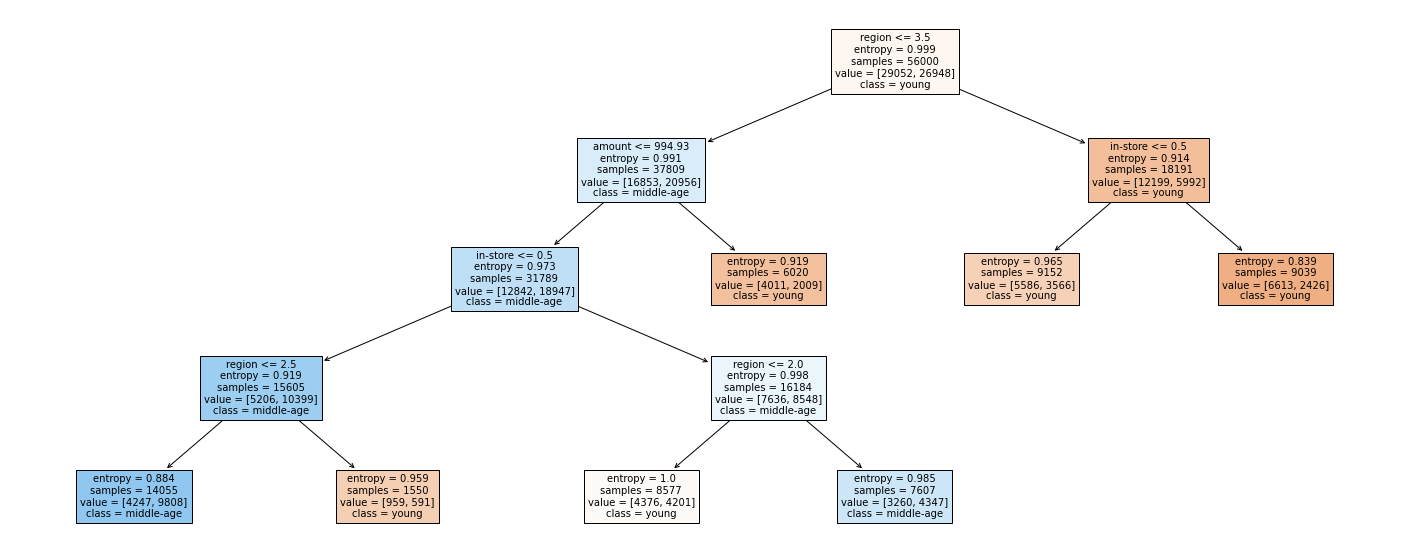

In [248]:
# Decision Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,10))
tree = plot_tree(model,feature_names=X.columns,class_names=['young','middle-age','old'], filled=True,fontsize=10)

In [249]:
# Calculate importance:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(algo_DTC.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

    feature  importance
3    region       0.578
2    amount       0.253
0  in-store       0.168
1     items       0.000


#### Discretize In-store, use as dependent

In [250]:
# features
age_col = data.loc[:,['age']]
X = data.loc[:,['age','items','amount','region']]
X.head()

,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [251]:
# Dependent
y = data.loc[:,['in-store']]
y.head()

,in-store
0,0
1,0
2,1
3,1
4,1


In [252]:
# Comparing two classification algorithms
online_algos_Class = []
online_algos_Class.append(('Random Forest Classifier-d=2', RandomForestClassifier(criterion="entropy",max_depth=2)))
online_algos_Class.append(('Random Forest Classifier-d=3', RandomForestClassifier(criterion="entropy",max_depth=3)))
online_algos_Class.append(('Random Forest Classifier-d=4', RandomForestClassifier(criterion="entropy",max_depth=4)))
online_algos_Class.append(('Random Forest Classifier-d=5', RandomForestClassifier(criterion="entropy",max_depth=5)))
online_algos_Class.append(('Decision Tree Classifier-d=2', DecisionTreeClassifier(criterion="entropy",max_depth=2)))
online_algos_Class.append(('Decision Tree Classifier-d=3', DecisionTreeClassifier(criterion="entropy",max_depth=3)))
online_algos_Class.append(('Decision Tree Classifier-d=4', DecisionTreeClassifier(criterion="entropy",max_depth=4)))
online_algos_Class.append(('Decision Tree Classifier-d=5', DecisionTreeClassifier(criterion="entropy",max_depth=5)))


#Classificaiton
online_results = []
online_names = []
for name, algo in online_algos_Class:
    result = cross_val_score(algo, X,y['in-store'], cv=3, scoring='accuracy')
    online_names.append(name)
    online_results.append(result)
        
# Print the cross_val_score
for i in range(len(online_names)):
    print(online_names[i],online_results[i].mean())

Random Forest Classifier-d=2 0.7437253266427472
Random Forest Classifier-d=3 0.796387346965708
Random Forest Classifier-d=4 0.8344500049483274
Random Forest Classifier-d=5 0.874012494179306
Decision Tree Classifier-d=2 0.7500000325785323
Decision Tree Classifier-d=3 0.8344000041670521
Decision Tree Classifier-d=4 0.8399374658870541
Decision Tree Classifier-d=5 0.8649624910514389


In [253]:
# Comparing min_samples in Decision Tree Classifier
online_algos_Class = []
online_algos_Class.append(('Decision Tree Classifier-min=2', DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=2)))
online_algos_Class.append(('Decision Tree Classifier-min=.1', DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=.1)))
online_algos_Class.append(('Decision Tree Classifier-min=.2', DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=.2)))
online_algos_Class.append(('Decision Tree Classifier-min=.4', DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=.4)))
online_algos_Class.append(('Decision Tree Classifier-min=.8', DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=.5)))

#Classificaiton
online_results = []
online_names = []
for name, algo in online_algos_Class:
    result = cross_val_score(algo, X,y['in-store'], cv=3, scoring='accuracy')
    online_names.append(name)
    online_results.append(result)
        
# Print the cross_val_score
for i in range(len(online_names)):
    print(online_names[i],online_results[i].mean())

Decision Tree Classifier-min=2 0.8649624910514389
Decision Tree Classifier-min=.1 0.8649624910514389
Decision Tree Classifier-min=.2 0.8399374658870541
Decision Tree Classifier-min=.4 0.8399374658870541
Decision Tree Classifier-min=.8 0.8344000041670521


In [254]:
# Test/Train Split function from SciKit-Learn
# Age alone as X
X_train, X_test, y_train, y_test = train_test_split(age_col, y, test_size = 0.3, random_state = 123)
age_algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=6)
age_model = age_algo_DTC.fit(X_train, y_train)
age_preds = age_model.predict(X_test)
print('age model:', classification_report(y_test,age_preds))



# 70% for training and 30% used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# Modeling (Classification)
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=6)
# Run the training using fit function
model = algo_DTC.fit(X_train, y_train)

# Predictions using the model 
preds = model.predict(X_test)

# Classification report
print('all features model:',classification_report(y_test,preds))

age model:               precision    recall  f1-score   support

           0       0.70      0.30      0.42     11831
           1       0.56      0.88      0.69     12169

    accuracy                           0.59     24000
   macro avg       0.63      0.59      0.55     24000
weighted avg       0.63      0.59      0.55     24000

all features model:               precision    recall  f1-score   support

           0       1.00      0.75      0.86     11831
           1       0.81      1.00      0.89     12169

    accuracy                           0.88     24000
   macro avg       0.90      0.88      0.88     24000
weighted avg       0.90      0.88      0.88     24000



In [255]:
# Decision Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,10))
tree = plot_tree(model,feature_names=X.columns, class_names=['online', 'in-store'], filled=True,fontsize=10

SyntaxError: unexpected EOF while parsing (<ipython-input-255-410b365729b6>, line 4)

In [256]:
# Calculate importance:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(algo_DTC.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

  feature  importance
3  region       0.760
2  amount       0.201
0     age       0.039
1   items       0.000


#### Discretize Amount as the Dependent Variable

In [259]:
# Use qcut to discretize amount
bins = 4
amount = pd.qcut(data['amount'], q=bins,labels=range(bins))
amount.head()

0    0
1    0
2    3
3    2
4    3
Name: amount, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [260]:
# Create X with features
X = data.loc[:,['in-store','age','items','region']]
X.head()

,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [262]:
# Comparing two classification algorithms
amount_algos_Class = []
amount_algos_Class.append(('Random Forest Classifier-d=2', RandomForestClassifier(criterion="entropy",max_depth=2)))
amount_algos_Class.append(('Random Forest Classifier-d=3', RandomForestClassifier(criterion="entropy",max_depth=3)))
amount_algos_Class.append(('Random Forest Classifier-d=4', RandomForestClassifier(criterion="entropy",max_depth=4)))
amount_algos_Class.append(('Random Forest Classifier-d=5', RandomForestClassifier(criterion="entropy",max_depth=5)))
amount_algos_Class.append(('Decision Tree Classifier-d=2', DecisionTreeClassifier(criterion="entropy",max_depth=2)))
amount_algos_Class.append(('Decision Tree Classifier-d=3', DecisionTreeClassifier(criterion="entropy",max_depth=3)))
amount_algos_Class.append(('Decision Tree Classifier-d=4', DecisionTreeClassifier(criterion="entropy",max_depth=4)))
amount_algos_Class.append(('Decision Tree Classifier-d=5', DecisionTreeClassifier(criterion="entropy",max_depth=5)))


#Classificaiton
amount_results = []
amount_names = []
for name, algo in amount_algos_Class:
    result = cross_val_score(algo, X,amount, cv=3, scoring='accuracy')
    amount_names.append(name)
    amount_results.append(result)

    
# Print the cross_val_score
for i in range(len(amount_names)):
    print(amount_names[i],amount_results[i].mean())

Random Forest Classifier-d=2 0.4899874395273652
Random Forest Classifier-d=3 0.4898249490586835
Random Forest Classifier-d=4 0.49526250718610937
Random Forest Classifier-d=5 0.49531250937365234
Decision Tree Classifier-d=2 0.4873374726519511
Decision Tree Classifier-d=3 0.49526250718610937
Decision Tree Classifier-d=4 0.4948875118735508
Decision Tree Classifier-d=5 0.49493751312358203


In [263]:
# Comparing min_samples in Decision Tree Classifier
amount_algos_Class = []
amount_algos_Class.append(('Decision Tree Classifier-min=2', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=2)))
amount_algos_Class.append(('Decision Tree Classifier-min=.1', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.1)))
amount_algos_Class.append(('Decision Tree Classifier-min=.2', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.2)))
amount_algos_Class.append(('Decision Tree Classifier-min=.4', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.4)))
amount_algos_Class.append(('Decision Tree Classifier-min=.8', DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=.5)))

#Classificaiton
amount_results = []
amount_names = []
for name, algo in amount_algos_Class:
    result = cross_val_score(algo, X,amount, cv=3, scoring='accuracy')
    amount_names.append(name)
    amount_results.append(result)

    
# Print the cross_val_score
for i in range(len(amount_names)):
    print(amount_names[i],amount_results[i].mean())

Decision Tree Classifier-min=2 0.4948875118735508
Decision Tree Classifier-min=.1 0.4950000104673184
Decision Tree Classifier-min=.2 0.49526250718610937
Decision Tree Classifier-min=.4 0.4873374726519511
Decision Tree Classifier-min=.8 0.44696248045193143


In [264]:
# 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, amount, test_size = 0.3, random_state = 123)

# Modeling (Classification)
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=4)
# Run the training using fit function
model = algo_DTC.fit(X_train, y_train)

# Predictions using the model
preds = model.predict(X_test)

# Classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      6017
           1       0.31      0.01      0.01      5836
           2       0.42      0.53      0.47      6091
           3       0.53      0.88      0.66      6056

    accuracy                           0.50     24000
   macro avg       0.46      0.50      0.43     24000
weighted avg       0.46      0.50      0.43     24000



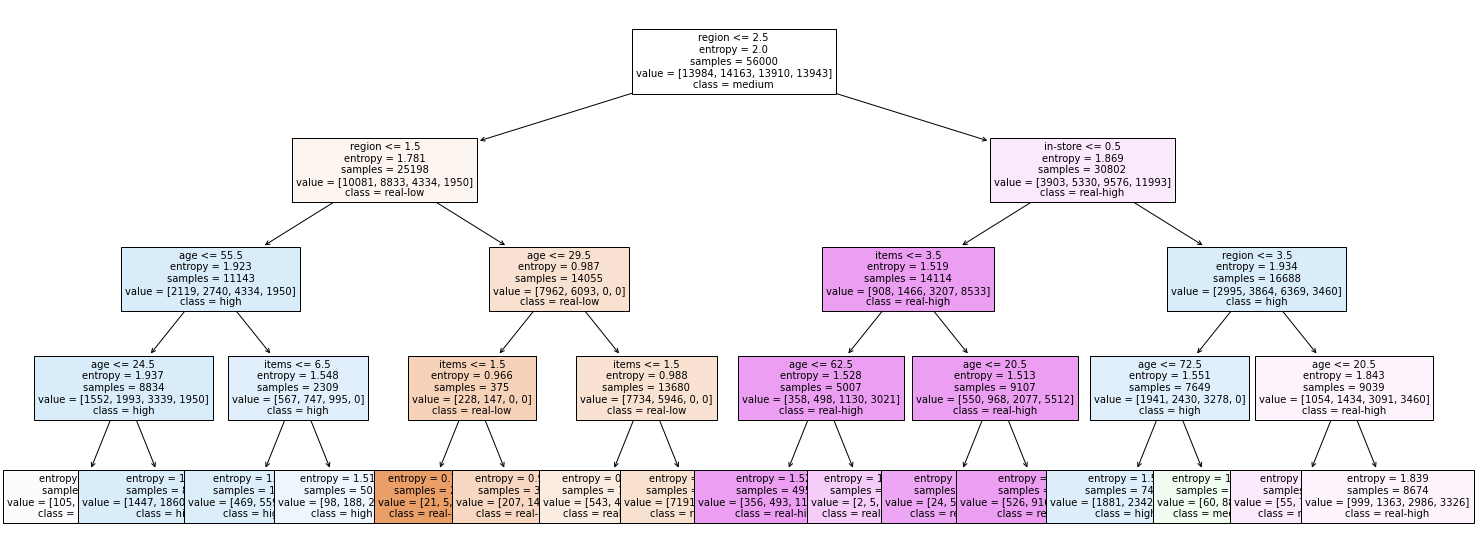

In [265]:
# Decision Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,10))
tree = plot_tree(model,feature_names=X.columns,class_names=['real-low','medium','high','real-high'], filled=True,fontsize=10)

In [266]:
# Calculate importance:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(algo_DTC.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

    feature  importance
3    region       0.829
0  in-store       0.140
1       age       0.030
2     items       0.001
